In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

usa = pd.read_json('https://api.covid19api.com/total/country/united-states')
usa.info()
usa.head()
usa.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Country      135 non-null    object             
 1   CountryCode  135 non-null    object             
 2   Province     135 non-null    object             
 3   City         135 non-null    object             
 4   CityCode     135 non-null    object             
 5   Lat          135 non-null    int64              
 6   Lon          135 non-null    int64              
 7   Confirmed    135 non-null    int64              
 8   Deaths       135 non-null    int64              
 9   Recovered    135 non-null    int64              
 10  Active       135 non-null    int64              
 11  Date         135 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(6), object(5)
memory usage: 12.8+ KB


,Lat,Lon,Confirmed,Deaths,Recovered,Active
count,135.0,135.0,135.000000,135.000000,135.000000,135.000000
mean,0.0,0.0,71324.925926,3158.511111,55488.711111,12677.703704
std,0.0,0.0,24459.109420,1481.023566,30835.367024,17854.899194
min,0.0,0.0,548.000000,17.000000,28.000000,97.000000
25%,0.0,0.0,77497.500000,2630.000000,26345.500000,619.000000
50%,0.0,0.0,82122.000000,3304.000000,75582.000000,2425.000000
75%,0.0,0.0,83959.000000,4637.000000,78579.500000,19634.000000
max,0.0,0.0,84171.000000,4638.000000,79415.000000,58108.000000


In [2]:
usa.drop('CountryCode', axis=1, inplace=True)
usa.drop('Province', axis=1, inplace=True)
usa.drop('City', axis=1, inplace=True)
usa.drop('CityCode', axis=1,  inplace=True)
usa.drop('Lat', axis=1, inplace=True)
usa.drop('Lon', axis=1, inplace=True)
usa.head(2)

,Country,Confirmed,Deaths,Recovered,Active,Date
0,China,548,17,28,503,2020-01-22 00:00:00+00:00
1,China,643,18,30,595,2020-01-23 00:00:00+00:00


In [3]:
usa["Confirmed_diff"] = usa.Confirmed - usa.Confirmed.shift(1)
usa["Deaths_diff"] = usa.Deaths - usa.Deaths.shift(1)
usa["Recovered_diff"] = usa.Recovered - usa.Recovered.shift(1)
usa["Active_diff"] = usa.Active - usa.Active.shift(1)
usa['Deathrate'] = usa.Deaths / usa.Confirmed * 100
usa['DateInt'] = (usa.Date - usa.Date[0]).astype("timedelta64[D]").astype("int32")
usa.fillna(0, inplace=True)
usa.head()

,Country,Confirmed,Deaths,Recovered,Active,Date,Confirmed_diff,Deaths_diff,Recovered_diff,Active_diff,Deathrate,DateInt
0,China,548,17,28,503,2020-01-22 00:00:00+00:00,0.0,0.0,0.0,0.0,3.102190,0
1,China,643,18,30,595,2020-01-23 00:00:00+00:00,95.0,1.0,2.0,92.0,2.799378,1
2,China,920,26,36,858,2020-01-24 00:00:00+00:00,277.0,8.0,6.0,263.0,2.826087,2
3,China,1406,42,39,1325,2020-01-25 00:00:00+00:00,486.0,16.0,3.0,467.0,2.987198,3
4,China,2075,56,49,1970,2020-01-26 00:00:00+00:00,669.0,14.0,10.0,645.0,2.698795,4


In [4]:
usa.info()
usa.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Country         135 non-null    object             
 1   Confirmed       135 non-null    int64              
 2   Deaths          135 non-null    int64              
 3   Recovered       135 non-null    int64              
 4   Active          135 non-null    int64              
 5   Date            135 non-null    datetime64[ns, UTC]
 6   Confirmed_diff  135 non-null    float64            
 7   Deaths_diff     135 non-null    float64            
 8   Recovered_diff  135 non-null    float64            
 9   Active_diff     135 non-null    float64            
 10  Deathrate       135 non-null    float64            
 11  DateInt         135 non-null    int32              
dtypes: datetime64[ns, UTC](1), float64(5), int32(1), int64(4), object(1)
memory usage: 12.3+ KB


,Confirmed,Deaths,Recovered,Active,Confirmed_diff,Deaths_diff,Recovered_diff,Active_diff,Deathrate,DateInt
count,135.000000,135.000000,135.000000,135.000000,135.00000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,71324.925926,3158.511111,55488.711111,12677.703704,619.42963,34.229630,588.051852,-2.851852,4.146598,67.000000
std,24459.109420,1481.023566,30835.367024,17854.899194,1662.22754,117.588388,871.633646,1758.026682,1.192919,39.115214
min,548.000000,17.000000,28.000000,97.000000,-1.00000,0.000000,-849.000000,-3115.000000,2.051749,0.000000
25%,77497.500000,2630.000000,26345.500000,619.000000,11.00000,0.000000,24.000000,-389.500000,3.393546,33.500000
50%,82122.000000,3304.000000,75582.000000,2425.000000,58.00000,3.000000,126.000000,-47.000000,4.021277,67.000000
75%,83959.000000,4637.000000,78579.500000,19634.000000,365.00000,30.500000,755.500000,0.000000,5.517291,100.500000
max,84171.000000,4638.000000,79415.000000,58108.000000,15136.00000,1290.000000,3995.000000,13749.000000,5.534862,134.000000


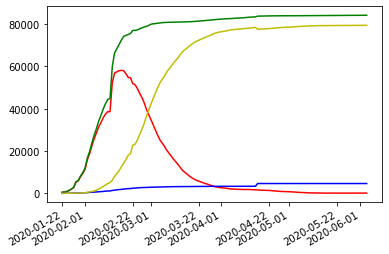

In [5]:
fig, ax = plt.subplots()
ax.plot(usa['Date'], usa['Active'], 'r' , usa['Date'], usa['Confirmed'], 'g', usa['Date'], usa['Deaths'], 'b', usa['Date'], usa['Recovered'], 'y')
fig.autofmt_xdate()

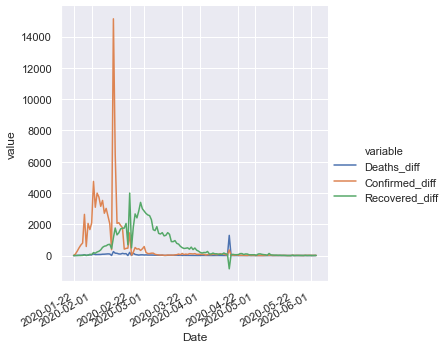

In [6]:
sns.set()
g = sns.relplot(x="Date",
                y="value",
                data=pd.melt(usa[["Date", "Deaths_diff", "Confirmed_diff", "Recovered_diff"]], "Date"),
                hue="variable",
                kind="line")
g.fig.autofmt_xdate()

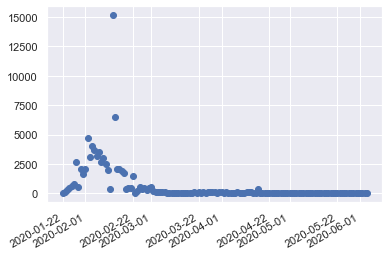

In [7]:
fig, ax = plt.subplots()
ax.plot_date(usa.Date, usa.Confirmed_diff)
fig.autofmt_xdate()

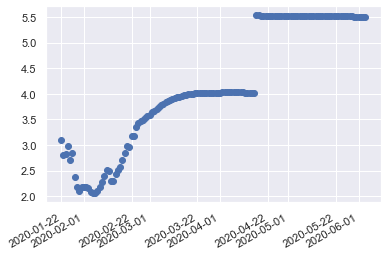

In [8]:
fig, ax = plt.subplots()
ax.plot_date(usa.Date, usa.Deathrate)
fig.autofmt_xdate()

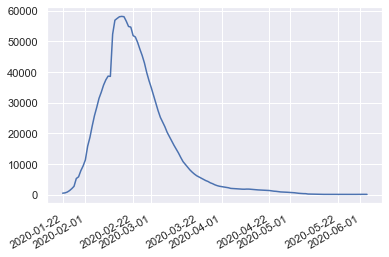

In [9]:
fig, ax = plt.subplots()
ax.plot(usa.Date, usa.Active)
fig.autofmt_xdate()

Best parameter (CV score=-115.948):
{'svr__C': 0.5, 'svr__epsilon': 0.5, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}
0.0


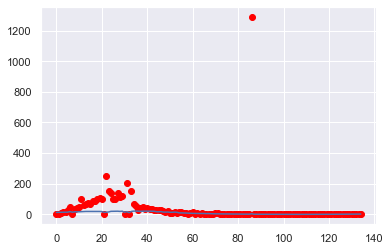

In [10]:
from svr_covid import predict_svr
X = usa.iloc[:, [11,6,8]]
Y = usa.iloc[:, [7]]
y_pred = predict_svr(X, Y)
fig, ax = plt.subplots()
ax.scatter(X.DateInt, Y, c="red")
ax.plot(X.DateInt, y_pred)

(0.0, 300.0)

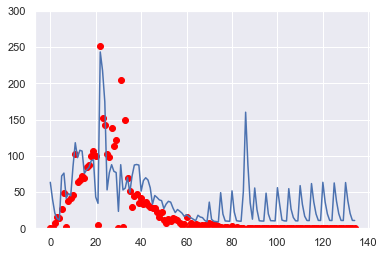

In [11]:
from lstm_covid import predict_lstm
X = usa.iloc[0:135, [6,8]]
Y = usa.iloc[0:135, [7]]
y_pred = predict_lstm(X, Y)
fig, ax = plt.subplots()
ax.scatter(X.index, Y, c="red")
ax.plot(X.index, y_pred.reshape((-1)))
#ax.set_ylim(0,300)

Wider: -13384.01 (38178.55) MSE


(0.0, 300.0)

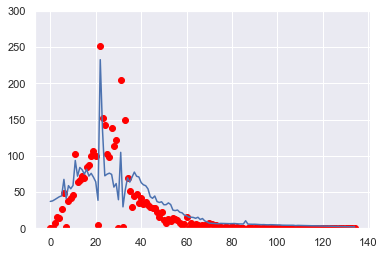

In [12]:
from mlp_covid import predict_mlp
X = usa.iloc[:, [11,6,8]]
Y = usa.iloc[:, [7]]
fig, ax = plt.subplots()
ax.scatter(X.index, Y, c="red")
ax.plot(X.index, predict_mlp(X, Y))
#ax.set_ylim(0,300)